# Problem Statement:
    Identifying what is the fashion category item the customer is wearing.. We are using the Fashion Immenance Data here.
    A Dataset containing the images of  bags shoes and dresses

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fashion_train_df =  pd.read_csv('Fashion-MNIST-Datasets/fashion-mnist_train.csv',sep=',')

In [3]:
fashion_test_df =  pd.read_csv('Fashion-MNIST-Datasets/fashion-mnist_test.csv',sep=',')

# Visualizing The Dataset

In [4]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#Exploring test data 
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [8]:
# Shape of data

fashion_train_df.shape

(60000, 785)

In [9]:
 
fashion_test_df.shape

(10000, 785)

In [10]:
# converting our data into arrays for training and testing data, so we can do our visualization

In [11]:
training = np.array(fashion_train_df, dtype='float32')

In [12]:
testing = np.array(fashion_test_df, dtype='float32')

# Visualzing few images from our dataset

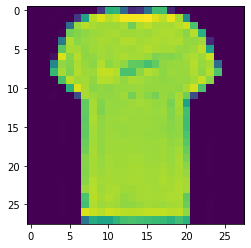

In [13]:
plt.imshow(training[10,1:].reshape(28,28)) # taking image data from 10th row and all columns

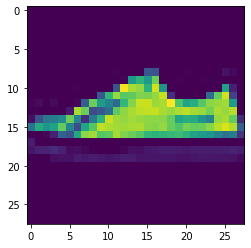

In [14]:
plt.imshow(training[589,1:].reshape(28,28))

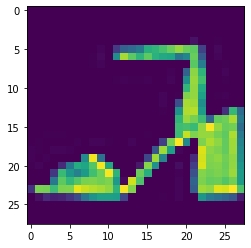

In [15]:
plt.imshow(training[60,1:].reshape(28,28))

3.0

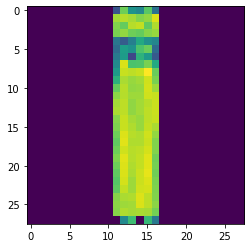

In [16]:
# can choose random image so can get overall idea about images.
import random
i= random.randint(1,60000)
plt.imshow(training[i,1:].reshape(28,28))
lable = training[i,0]
lable

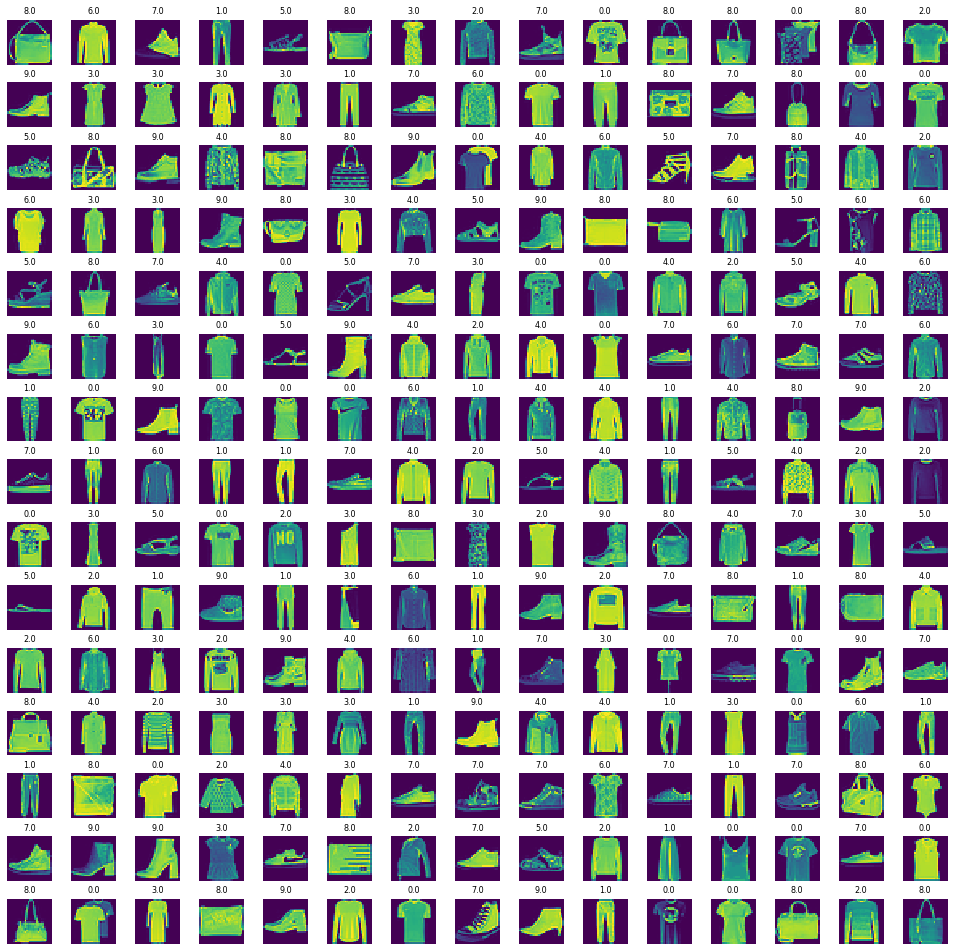

In [17]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)


# Training The Model

In [18]:
X_train = training[:,1:]/255
y_train = training[:,0]

In [19]:
X_test = testing[:,1:]/255
y_test = testing[:,0]

In [20]:
# keeping our validation dataset

from sklearn.model_selection import train_test_split

In [21]:
X_train,X_validate,y_train,y_validate = train_test_split(X_train,y_train,test_size=0.2,random_state=12345)

In [22]:
# we need to convert our data into 28 x 28 mat so our model can perform the operations


In [23]:
X_train = X_train.reshape(X_train.shape[0],* (28,28,1)) # we are reshaping our arrays into image format which will help us 
X_test = X_test.reshape(X_test.shape[0],* (28,28,1)) # to feed our data to Convolutional Neural Network.
X_validate = X_validate.reshape(X_validate.shape[0],*(28,28,1))

In [24]:
X_train.shape  # we have 48k sample and (28,28,1) means its a gray scale image

(48000, 28, 28, 1)

In [25]:
X_test.shape

(10000, 28, 28, 1)

In [26]:
X_validate.shape

(12000, 28, 28, 1)

In [27]:
# importing libraries for cnn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [28]:
cnn_model = Sequential()

In [29]:
cnn_model.add(Conv2D(32,3,3,input_shape=(28,28,1),activation='relu'))

In [30]:
# adding MaxPooling Layer

cnn_model.add(MaxPooling2D(pool_size=(2,2)))

In [31]:
# Flattening our model
cnn_model.add(Flatten())

In [32]:
# adding Dense
cnn_model.add(Dense(units= 32, activation='relu'))

In [33]:
cnn_model.add(Dense(units=10,activation='sigmoid'))

In [34]:
# using Adam Optimizer
cnn_model.compile(loss='sparse_categorical_crossentropy',optimizer = Adam(lr=0.001), metrics=['accuracy'])

In [37]:
epochs = 100

In [38]:
cnn_model.fit(
    X_train,
    y_train,
    batch_size=512,
    epochs=100,
    verbose=1,
    validation_data=(X_validate,y_validate))

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 1s 25us/sample - loss: 0.4494 - accuracy: 0.8361 - val_loss: 0.4582 - val_accuracy: 0.8340
Epoch 2/100
48000/48000 [==============================] - 1s 26us/sample - loss: 0.4422 - accuracy: 0.8389 - val_loss: 0.4495 - val_accuracy: 0.8366
Epoch 3/100
48000/48000 [==============================] - 1s 26us/sample - loss: 0.4355 - accuracy: 0.8416 - val_loss: 0.4606 - val_accuracy: 0.8307
Epoch 4/100
48000/48000 [==============================] - 1s 25us/sample - loss: 0.4316 - accuracy: 0.8422 - val_loss: 0.4384 - val_accuracy: 0.8407
Epoch 5/100
48000/48000 [==============================] - 1s 25us/sample - loss: 0.4249 - accuracy: 0.8446 - val_loss: 0.4392 - val_accuracy: 0.8395
Epoch 6/100
48000/48000 [==============================] - 1s 25us/sample - loss: 0.4246 - accuracy: 0.8449 - val_loss: 0.4325 - val_accuracy: 0.8428
Epoch 7/100
48000/48000 [=========================

Epoch 55/100
48000/48000 [==============================] - 1s 26us/sample - loss: 0.3336 - accuracy: 0.8802 - val_loss: 0.3675 - val_accuracy: 0.8691
Epoch 56/100
48000/48000 [==============================] - 1s 25us/sample - loss: 0.3338 - accuracy: 0.8787 - val_loss: 0.3672 - val_accuracy: 0.8677
Epoch 57/100
48000/48000 [==============================] - 1s 26us/sample - loss: 0.3330 - accuracy: 0.8796 - val_loss: 0.3695 - val_accuracy: 0.8685
Epoch 58/100
48000/48000 [==============================] - 1s 26us/sample - loss: 0.3321 - accuracy: 0.8798 - val_loss: 0.3774 - val_accuracy: 0.8630
Epoch 59/100
48000/48000 [==============================] - 1s 26us/sample - loss: 0.3309 - accuracy: 0.8801 - val_loss: 0.3696 - val_accuracy: 0.8677
Epoch 60/100
48000/48000 [==============================] - 1s 29us/sample - loss: 0.3291 - accuracy: 0.8816 - val_loss: 0.3657 - val_accuracy: 0.8702
Epoch 61/100
48000/48000 [==============================] - 1s 27us/sample - loss: 0.3288 - ac

# Step 5 :Evaluating our model

In [39]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy:{:.3f}'.format(evaluation[1]))

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test Accuracy:0.875


In [40]:
# will visualize our prediction

In [41]:
predicted_classes = cnn_model.predict_classes(X_test)

In [42]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

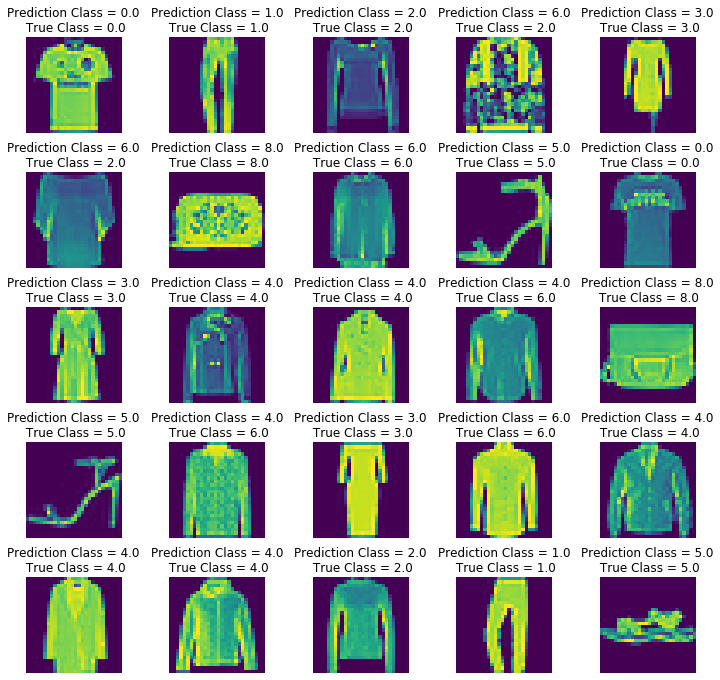

In [43]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

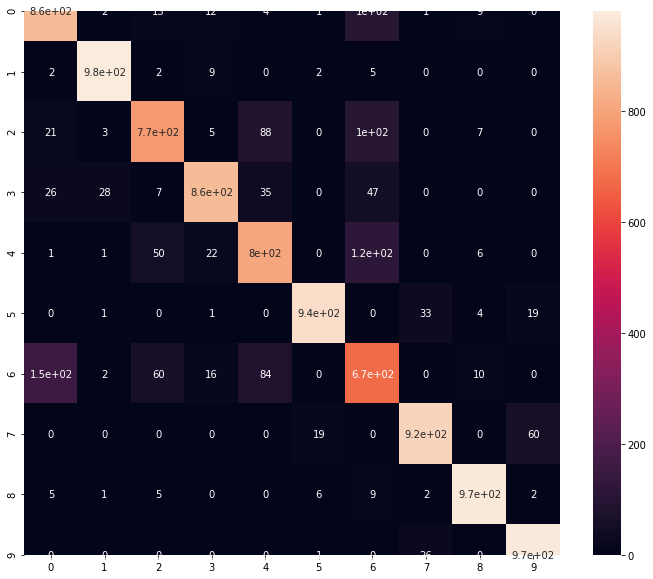

In [44]:
#plotting the confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted_classes)
plt.figure(figsize=(12,10))
sns.heatmap(cm,annot=True)
#print(cm)
# the sum of diagonal elements will show total true correct values

In [45]:
# plotting the classification report

from sklearn.metrics import classification_report
num_classes = 10
target_names= ['class{}'.format(i) for i in range(num_classes)]

print(classification_report(y_test,predicted_classes,target_names=target_names))

              precision    recall  f1-score   support

      class0       0.80      0.86      0.83      1000
      class1       0.96      0.98      0.97      1000
      class2       0.85      0.77      0.81      1000
      class3       0.93      0.86      0.89      1000
      class4       0.79      0.80      0.80      1000
      class5       0.97      0.94      0.96      1000
      class6       0.64      0.67      0.66      1000
      class7       0.94      0.92      0.93      1000
      class8       0.96      0.97      0.97      1000
      class9       0.92      0.97      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



## This are 10 classes for images
0. T-shirt/Top
1.Trouser
2.Pull-Over
3.Dress
4.Coat
5.Sandal
6.Shirt
7.Sneaker
8.Bag
9.Ankle Boot